In [1]:
# svm 、 xgboost 、多元回归

In [2]:

import pandas as pd
#from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error

In [6]:
data = pd.read_pickle('./pickle/ult_20_dummy.pkl')
#data = pd.read_pickle('./pickle/xgbr_20_dummy.pkl')
data.shape

(1974, 17)

In [7]:
data.head()

,ETA_Beta,ETA_EtaP_B_RC,nHBAcc_Lipinski,ETA_BetaP,C2SP2,ATSc5,maxaaO,ATSc1,C1SP2,ECCEN,mindssC,ATSc2,ETA_EtaP_B,minaaO,nTG12Ring,ATSp4,IC50_nM
0,32.50,0.01887,4,1.04839,11,-0.080148,0.0,0.460175,0,912,0.0,-0.217040,0.00500,0.0,0,4128.339568,2.5
1,33.50,0.01772,4,1.01515,11,-0.080148,0.0,0.460175,0,976,0.0,-0.217040,0.00469,0.0,0,4811.560374,7.5
2,40.25,0.02094,5,1.21970,16,-0.059065,0.0,0.519350,0,977,0.0,-0.236031,0.00791,0.0,0,4479.177597,3.1
3,33.50,0.01823,4,1.01515,11,-0.079743,0.0,0.460206,0,983,0.0,-0.216970,0.00520,0.0,0,4311.294610,3.9
4,39.50,0.01823,4,1.19697,16,-0.069664,0.0,0.462912,0,983,0.0,-0.215099,0.00520,0.0,0,4265.064807,7.4


In [8]:
y = data['IC50_nM']
X = data.drop(labels='IC50_nM',axis=1)

In [9]:
from sklearn.metrics import r2_score,mean_squared_error

def evaluate(data,model):
    pre = model.predict(data)
    pre_res = [round(res) for res in pre]
    y = data.get_label()
    acc = r2_score(y,pre_res)
    return acc
#先定义评价函数
def print_r2_score(model,x_train,y_train,x_test,y_test):
    print(model.score(x_train,y_train))
    print(model.score(x_test,y_test))

In [10]:
#标准化 0.80
std1 = MinMaxScaler()
X=std1.fit_transform(X)
std2 = MinMaxScaler()
y=std2.fit_transform(y.values.reshape(-1,1))

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=666)
pd.DataFrame(x_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.120148,0.497765,0.046154,0.721733,0.500000,0.805280,0.000000,0.050850,0.00,0.007742,0.484430,0.941902,0.523012,0.000000,0.0,0.144257
1,0.245841,0.402729,0.061538,0.778696,0.791667,0.831449,0.000000,0.094339,0.05,0.036858,0.235369,0.908587,0.376899,0.000000,0.0,0.230067
2,0.171904,0.436133,0.046154,0.903678,0.541667,0.840253,0.881474,0.064187,0.05,0.014426,0.484430,0.942615,0.307194,0.881474,0.0,0.134747
3,0.147874,0.357328,0.046154,0.898328,0.458333,0.795741,0.879982,0.065751,0.00,0.010720,0.484430,0.965987,0.293566,0.879982,0.0,0.075320
4,0.221811,0.050576,0.030769,0.476722,0.625000,0.814901,0.000000,0.052258,0.00,0.081260,0.786602,0.954832,0.134718,0.000000,0.0,0.205111


### 尝试线性回归和梯度下降

In [11]:
from sklearn.svm import SVR
svr = SVR(gamma=100)
svr.fit(x_train,y_train)
print_r2_score(svr,x_train,y_train,x_test,y_test)

C:\Users\wtf\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


-8.820526262290205
-65.23968693093067


## 3.xgboost

In [12]:
%%time
import xgboost as xgb
from xgboost import plot_importance
from xgboost import XGBRegressor as XGBR

from matplotlib import pyplot as plt
from sklearn.model_selection import KFold, cross_val_score as CVS
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
 

#1.sklearn实现法 100和6
xgbr = XGBR(n_estimators=300,max_depth=6, n_jobs=-1,learning_rate=0.15)
xgbr.fit(x_train, y_train,
        eval_set=[(x_train, y_train), (x_test,y_test)],
        eval_metric='rmse',
        verbose=30)

evals_result = xgbr.evals_result()#fit中有eval_metric


[0]	validation_0-rmse:0.42351	validation_1-rmse:0.42323
[30]	validation_0-rmse:0.00453	validation_1-rmse:0.00641
[60]	validation_0-rmse:0.00193	validation_1-rmse:0.00546
[90]	validation_0-rmse:0.00134	validation_1-rmse:0.00543
[120]	validation_0-rmse:0.00093	validation_1-rmse:0.00543
[150]	validation_0-rmse:0.00093	validation_1-rmse:0.00543
[180]	validation_0-rmse:0.00093	validation_1-rmse:0.00543
[210]	validation_0-rmse:0.00093	validation_1-rmse:0.00543
[240]	validation_0-rmse:0.00093	validation_1-rmse:0.00543
[270]	validation_0-rmse:0.00093	validation_1-rmse:0.00543
[299]	validation_0-rmse:0.00093	validation_1-rmse:0.00543
Wall time: 1.72 s


In [23]:
## 做预测反推
test_data = pd.read_pickle('./pickle/50_test_17_dummy.pkl')

test_y = test_data['IC50_nM']
test_X = test_data.drop(labels='IC50_nM',axis=1)

#test_y = std2.transform(test_y)
test_X = std1.transform(test_X)

pred_y = xgbr.predict(test_X)

print(pred_y)
#pred_inverse_y = std2.inverse_transform(pred_y)

[ 1.90783438e-04  8.13311199e-05  1.37727649e-04  1.35604688e-03
 -2.35089319e-04  2.17155972e-03  1.24644337e-03  3.23998654e-04
  3.53625772e-04  6.19863218e-04  8.26995063e-04  4.78335831e-04
  5.72205572e-05  3.55979224e-04 -3.58588914e-05  4.02661011e-04
  9.25892848e-04  2.82533205e-04  2.33590580e-03  6.51868249e-05
 -1.19910124e-04  3.57971403e-05  1.89155247e-03  6.58434699e-04
  3.44931777e-03  4.66162805e-03  1.44224497e-04  2.23601307e-03
  2.17252504e-03  2.54573510e-03  3.09188128e-03  3.49467248e-03
  3.58799309e-03  4.38154303e-03  4.47675167e-03 -5.95485908e-04
 -1.03116105e-03  1.51711877e-03  2.73735877e-05  2.73735877e-05
  1.07415348e-04  1.07415348e-04  1.07415348e-04 -2.01786999e-04
  1.07415348e-04  5.48444164e-04  4.19344404e-04  4.24737344e-04
  2.81876390e-04  1.80842195e-04]


In [25]:
pred_inverse_y = std2.inverse_transform(pred_y.reshape(-1,1))

In [38]:
#print(pred_inverse_y)
ic50_df = pd.DataFrame(pred_inverse_y)
ic50_df.head()

,0
0,667.788025
1,284.704895
2,482.092743
3,4746.209961
4,-822.766602


In [39]:
ic50_df.columns = ['ic50']

In [40]:
import numpy as np

def cal_pIC50(input):
    pIC50 = []

    for i in input['ic50']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('ic50', 1)
        
    return x

In [45]:
pIC50 = cal_pIC50(ic50_df)
#pIC50.head(50)
df3 = pd.concat([ic50_df,pIC50],axis=1)
df3.to_csv('q2-test.csv',index=False)

<ipython-input-40-02918b863c1f>:8: RuntimeWarning: invalid value encountered in log10
  pIC50.append(-np.log10(molar))


## xgboost原生方法

In [13]:
#1.参数字典
param1 = {'silent':True
          ,'obj':'reg:linear'
          ,"subsample":1
          ,"max_depth":6
          ,"eta":0.3
          ,"gamma":0
          ,"lambda":1
          ,"alpha":0
          ,"nfold":5}
num_round = 300 #迭代300次
dfull = xgb.DMatrix(X, y)
cvresult1 = xgb.cv(param1, dfull, num_round)

[23:13:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "nfold", "obj", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:13:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "nfold", "obj", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:13:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "nfold", "obj", "silent" } might not be used.

  This may not be accurate due to

In [14]:
#传入fig 保存成高清矢量图
def save_svg(fig,name):
    fig.savefig(name, dpi=600, format='svg',bbox_inches = 'tight')

<Figure size 1440x576 with 0 Axes>

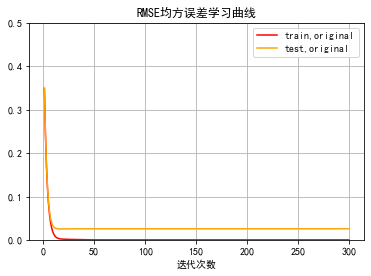

In [15]:
from matplotlib import pyplot as plt
from matplotlib import font_manager
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

plt.figure(figsize=(20, 8))
fig, ax = plt.subplots()

ax.set_ylim(top=0.5)
ax.grid()
ax.plot(range(1,301),cvresult1.iloc[:,0],c="red",label="train,original")
ax.plot(range(1,301),cvresult1.iloc[:,2],c="orange",label="test,original")
ax.legend(fontsize="xx-large")

plt.xlabel('迭代次数')
plt.title('RMSE均方误差学习曲线')
#plt.rcParams.update({'font.size': 11})
plt.legend(loc='best')

save_svg(plt,'Q2-rmse.svg')
plt.show()

In [16]:
print_r2_score(xgbr,x_train,y_train,x_test,y_test)
evals_result

0.9991359634977866
0.800877409508529


{'validation_0': OrderedDict([('rmse',
               [0.423506,
                0.360093,
                0.306186,
                0.260359,
                0.221403,
                0.188286,
                0.160135,
                0.136205,
                0.115859,
                0.098568,
                0.083866,
                0.071376,
                0.060755,
                0.051737,
                0.044067,
                0.03756,
                0.032026,
                0.027327,
                0.023344,
                0.019961,
                0.01709,
                0.014666,
                0.012613,
                0.010879,
                0.009413,
                0.008182,
                0.007152,
                0.006298,
                0.005585,
                0.005005,
                0.004532,
                0.00415,
                0.003842,
                0.003597,
                0.003392,
                0.003231,
                0.003106,
  

In [17]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor(n_estimators=300,max_depth=6,learning_rate=0.15)
lgbm.fit(x_train, y_train
        , eval_set=[(x_test, y_test)]
        , eval_metric='rmse',verbose=30)

C:\Users\wtf\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\wtf\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\wtf\Anaconda3\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


[30]	valid_0's rmse: 0.0127193	valid_0's l2: 0.000161781
[60]	valid_0's rmse: 0.0153672	valid_0's l2: 0.00023615
[90]	valid_0's rmse: 0.0178474	valid_0's l2: 0.00031853
[120]	valid_0's rmse: 0.0190917	valid_0's l2: 0.000364495
[150]	valid_0's rmse: 0.019966	valid_0's l2: 0.000398639
[180]	valid_0's rmse: 0.0205903	valid_0's l2: 0.000423962
[210]	valid_0's rmse: 0.0212102	valid_0's l2: 0.000449873
[240]	valid_0's rmse: 0.0215397	valid_0's l2: 0.000463958
[270]	valid_0's rmse: 0.0215968	valid_0's l2: 0.000466423
[300]	valid_0's rmse: 0.0222279	valid_0's l2: 0.00049408


LGBMRegressor(learning_rate=0.15, max_depth=6, n_estimators=300)

In [18]:
print_r2_score(lgbm,x_train,y_train,x_test,y_test)

0.8911873786862128
-2.3376558742403004


### mmmm

In [19]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor()
rfc.fit(x_train,y_train)

<ipython-input-19-e409a4ca54cc>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train,y_train)


RandomForestRegressor()

In [20]:
print_r2_score(rfc,x_train,y_train,x_test,y_test) ##可以接受

0.8172369318319841
0.5757475312080509
